In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Dataset
import zipfile

z = zipfile.ZipFile('archive.zip')

z.extractall()

In [3]:
folder = 'brain_tumor_dataset/yes/'
count = 1

for filename in os.listdir(folder):
    source = folder + filename
    destination = folder + "Y_" +str(count)+".jpg"
    os.rename(source, destination)
    count+=1
print("All files are renamed in the yes dir.")

All files are renamed in the yes dir.


In [4]:
folder = 'brain_tumor_dataset/no/'
count = 1

for filename in os.listdir(folder):
    source = folder + filename
    destination = folder + "N_" +str(count)+".jpg"
    os.rename(source, destination)
    count+=1
print("All files are renamed in the no dir.")

All files are renamed in the no dir.


In [5]:
# EDA(Exploratory Data Analysis)


In [6]:
listyes = os.listdir("brain_tumor_dataset/yes/")
number_files_yes = len(listyes)
print(number_files_yes)

listno = os.listdir("brain_tumor_dataset/no/")
number_files_no = len(listno)
print(number_files_no)

155
98


In [7]:
# Plot


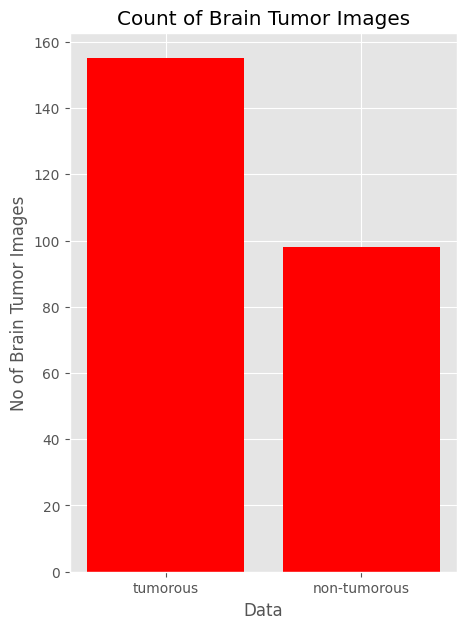

In [8]:
data = {'tumorous': number_files_yes, 'non-tumorous': number_files_no}

typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5,7))

plt.bar(typex, values, color="red")

plt.xlabel("Data")
plt.ylabel("No of Brain Tumor Images")
plt.title("Count of Brain Tumor Images")
plt.show()

In [9]:
# Data Augmentation
# 155(61%), 98(39%)
# imbalance



In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


In [11]:
def timing(sec_elapsed):
    h = int(sec_elapsed / (60*60))
    m = int(sec_elapsed % (60*60) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{s}"

In [12]:
def augmented_data(file_dir, n_generated_samples, save_to_dir):
    data_gen = ImageDataGenerator(rotation_range=10, 
                      width_shift_range=0.1,
                      height_shift_range=0.1,
                      shear_range=0.1,
                      brightness_range=(0.3, 1.0),
                      horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='nearest')
    for filename in os.listdir(file_dir):
        image = cv2.imread(file_dir + '/' + filename)
        image = image.reshape((1,) + image.shape)
        save_prefix = 'aug_' + filename[:-4]
        i=0
        for batch in data_gen.flow(x = image, batch_size = 1, save_to_dir = save_to_dir, save_prefix = save_prefix, save_format = "jpg"):
            i+=1
            if i>n_generated_samples:
                break

In [13]:
import os
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def create_directory(path):
    if not os.path.exists(path):
        os.makedirs(path)

def augmented_data(file_dir, n_generated_samples, save_to_dir):
    create_directory(save_to_dir)  # Ensure the save directory exists
    
    data_gen = ImageDataGenerator(rotation_range=10,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.1,
                                  zoom_range=0.1,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
    
    for filename in os.listdir(file_dir):
        image_path = os.path.join(file_dir, filename)
        image = Image.open(image_path)
        
        # Convert RGBA image to RGB if it has an alpha channel
        if image.mode == 'RGBA':
            image = image.convert('RGB')
        
        image = np.array(image)
        
        # Ensure the image has the correct shape (height, width, channels)
        if len(image.shape) == 2:  # Grayscale image
            image = np.expand_dims(image, axis=-1)
        image = np.expand_dims(image, axis=0)  # Add batch dimension
        
        save_prefix = 'aug_' + filename[:-4]
        i = 0
        for batch in data_gen.flow(x=image, batch_size=1, save_to_dir=save_to_dir, save_prefix=save_prefix, save_format="jpg"):
            i += 1
            if i >= n_generated_samples:
                break

yes_path = 'brain_tumor_dataset/yes'
no_path = 'brain_tumor_dataset/no'
augmented_data_path = 'augmented_data/'

start_time = time.time()
augmented_data(file_dir=yes_path, n_generated_samples=6, save_to_dir=augmented_data_path+'yes')
augmented_data(file_dir=no_path, n_generated_samples=9, save_to_dir=augmented_data_path+'no')
end_time = time.time()

execution_time = end_time - start_time
print(f"Augmentation completed in {execution_time:.2f} seconds")


Augmentation completed in 45.79 seconds


In [14]:
def data_summary(main_path):
    yes_path = "augmented_data/yes/" 
    no_path = "augmented_data/no/"
    
    n_pos = len(os.listdir(yes_path))
    n_neg = len(os.listdir(no_path))
    
    n = (n_pos + n_neg)
    
    pos_per = (n_pos*100)/n
    neg_per = (n_neg*100)/n
    
    print(f"Number of sample: {n}")
    print(f"{n_pos} Number of positive sample in percentage: {pos_per}%")
    print(f"{n_neg} Number of negative sample in percentage: {neg_per}%")

In [15]:
data_summary(augmented_data_path)

Number of sample: 1812
930 Number of positive sample in percentage: 51.324503311258276%
882 Number of negative sample in percentage: 48.675496688741724%


In [16]:
listyes = os.listdir("augmented_data/yes/")
number_files_yes = len(listyes)
print(number_files_yes)

listno = os.listdir("augmented_data/no/")
number_files_no = len(listno)
print(number_files_no)

930
882


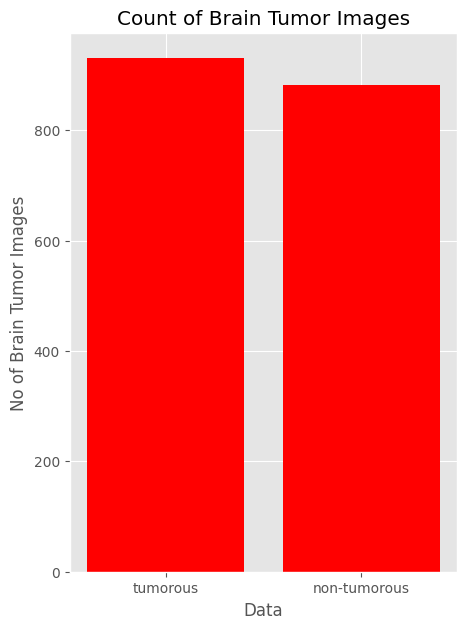

In [17]:
data = {'tumorous': number_files_yes, 'non-tumorous': number_files_no}

typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5,7))

plt.bar(typex, values, color="red")

plt.xlabel("Data")
plt.ylabel("No of Brain Tumor Images")
plt.title("Count of Brain Tumor Images")
plt.show()


In [18]:
# Data Preprocessing

In [19]:
# Convert BGR TO GRAY
# GaussianBlur
# Threshold
# Erode
# Dilate
# Find Contours

In [20]:
import cv2
import imutils
import matplotlib.pyplot as plt
import os

def crop_brain_tumor(image, plot=False):
    """
    Crops the brain tumor region from the given image.

    Parameters:
    image (ndarray): The input image from which to crop the tumor.
    plot (bool): If True, plots the original and cropped images.

    Returns:
    ndarray: The cropped image containing the tumor.
    """
    if image is None:
        raise ValueError("The input image is empty. Please provide a valid image.")

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thres = cv2.erode(thres, None, iterations=2)
    thres = cv2.dilate(thres, None, iterations=2)

    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    if not cnts:
        raise ValueError("No contours found in the image.")

    c = max(cnts, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]

    if plot:
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
        plt.title('Cropped Image')
        plt.axis('off')

        plt.show()

    return new_image

# Example usage with debugging
def load_and_crop_image(image_path):
    print(f"Loading image from: {image_path}")
    img = cv2.imread(image_path)
    if img is not None:
        print(f"Successfully loaded image: {image_path}")
        crop_brain_tumor(img, True)
    else:
        print(f"Failed to load image: {image_path}")




In [21]:
yes_image_path = 'augmented_data/yes/aug_Y_1_0_9202.jpg'
if os.path.exists(yes_image_path):
    load_and_crop_image(yes_image_path)
else:
    print(f"File does not exist: {yes_image_path}")

File does not exist: augmented_data/yes/aug_Y_1_0_9202.jpg


In [22]:
no_image_path = 'augmented_data/no/aug_N_1_0_2452.jpg'
if os.path.exists(no_image_path):
    load_and_crop_image(no_image_path)
else:
    print(f"File does not exist: {no_image_path}")


File does not exist: augmented_data/no/aug_N_1_0_2452.jpg


In [23]:

folder1 = 'augmented_data/no/'
folder2 = 'augmented_data/yes/'

for filename in os.listdir(folder1):
    img = cv2.imread(folder1 + filename)
    img = crop_brain_tumor(img, False)
    cv2.imwrite(folder1 + filename, img)
for filename in os.listdir(folder2):
    img = cv2.imread(folder2 + filename)
    img = crop_brain_tumor(img, False)
    cv2.imwrite(folder2 + filename, img)

In [24]:
from sklearn.utils import shuffle
def load_data(dir_list, image_size):
    X=[]
    y=[]
    
    image_width, image_height=image_size
    
    for directory in dir_list:
        for filename in os.listdir(directory):
            image = cv2.imread(directory + '/' + filename)
            image = crop_brain_tumor(image, plot=False)
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation = cv2.INTER_CUBIC)
            image = image/255.00
            X.append(image)
            if directory[-3:] == "yes":
                y.append(1)
            else:
                y.append(0)
    X=np.array(X)
    y=np.array(y)
    
    X,y = shuffle(X,y)
    print(f"Number of example is : {len(X)}")
    print(f"X SHAPE is : {X.shape}")
    print(f"y SHAPE is : {y.shape}")
    return X,y
            

In [25]:
augmented_path = 'augmented_data/'
augmeneted_yes = augmented_path + 'yes'
augmeneted_no = augmented_path + 'no'

IMAGE_WIDTH, IMAGE_HEIGHT = (240,240)

X,y = load_data([augmeneted_yes, augmeneted_no], (IMAGE_WIDTH, IMAGE_HEIGHT))

Number of example is : 1812
X SHAPE is : (1812, 240, 240, 3)
y SHAPE is : (1812,)


In [26]:
def plot_sample_images(X, y, n=50):

    for label in [0,1]:
        images = X[np.argwhere(y == label)]
        n_images = images[:n]
        
        columns_n = 10
        rows_n = int(n/ columns_n)

        plt.figure(figsize=(20, 10))
        
        i = 1        
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image[0])
            
            plt.tick_params(axis='both', which='both', 
                            top=False, bottom=False, left=False, right=False,
                            labelbottom=False, labeltop=False, labelleft=False,
                            labelright=False)
            
            i += 1
        
        label_to_str = lambda label: "Yes" if label == 1 else "No"
        plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
        plt.show()

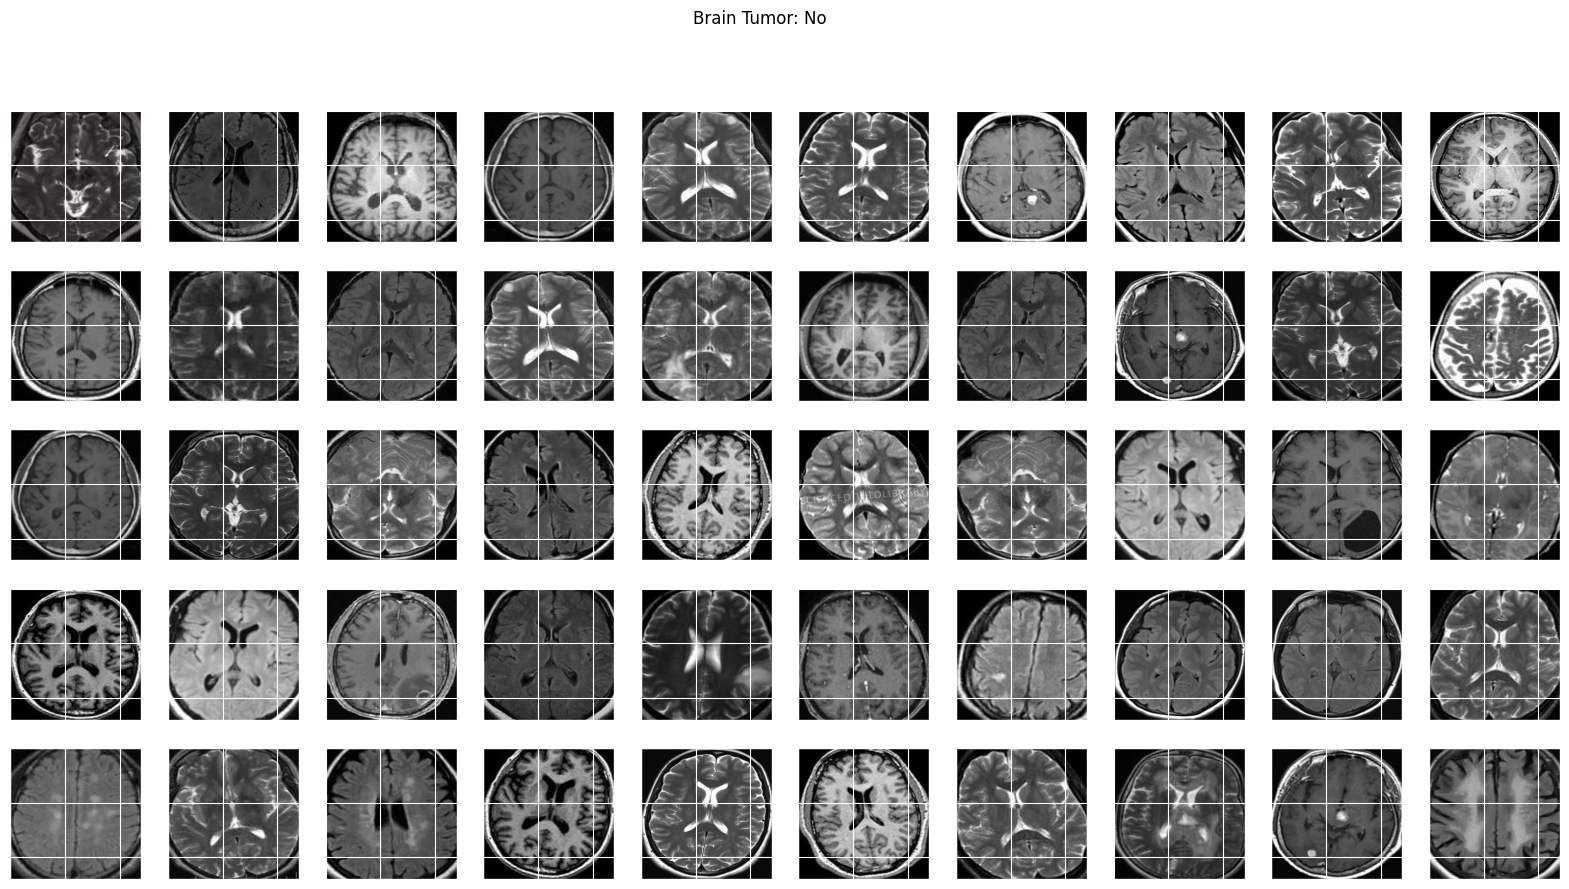

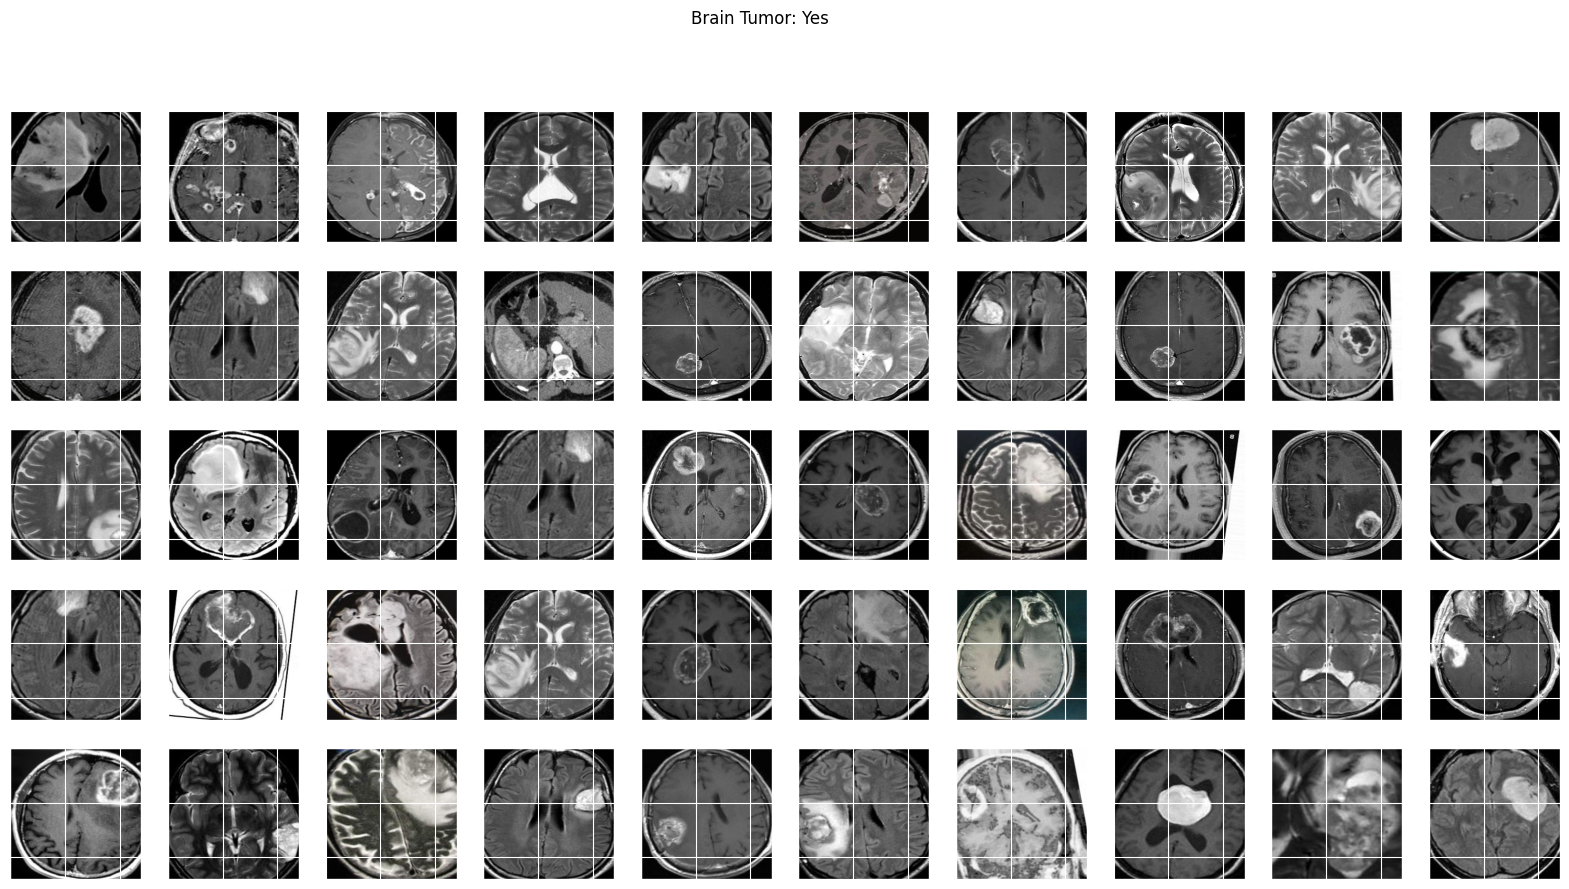

In [27]:
plot_sample_images(X,y)

In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD


In [29]:
# Data Spliting
# Train
# Test
# Validation
if not os.path.isdir('tumorous_and_nontumorous'):
    base_dir = 'tumorous_and_nontumorous'
    os.mkdir(base_dir)
if not os.path.isdir('tumorous_and_nontumorous/train'):
    train_dir = os.path.join(base_dir , 'train')
    os.mkdir(train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test'):
    test_dir = os.path.join(base_dir , 'test')
    os.mkdir(test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid'):
    valid_dir = os.path.join(base_dir , 'valid')
    os.mkdir(valid_dir)
if not os.path.isdir('tumorous_and_nontumorous/train/tumorous'):
    infected_train_dir = os.path.join(train_dir, 'tumorous')
    os.mkdir(infected_train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test/tumorous'):
    infected_test_dir = os.path.join(test_dir, 'tumorous')
    os.mkdir(infected_test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid/tumorous'):
    infected_valid_dir = os.path.join(valid_dir, 'tumorous')
    os.mkdir(infected_valid_dir)
if not os.path.isdir('tumorous_and_nontumorous/train/nontumorous'):
    healthy_train_dir = os.path.join(train_dir, 'nontumorous')
    os.mkdir(healthy_train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test/nontumorous'):
    healthy_test_dir = os.path.join(test_dir, 'nontumorous')
    os.mkdir(healthy_test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid/nontumorous'):
    healthy_valid_dir = os.path.join(valid_dir, 'nontumorous')
    os.mkdir(healthy_valid_dir)

In [30]:
original_dataset_tumorours = os.path.join('augmented_data','yes/')
original_dataset_nontumorours = os.path.join('augmented_data','no/')

In [31]:
# Define base directory and subdirectories
base_dir = 'tumorous_and_nontumorous'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
valid_dir = os.path.join(base_dir, 'valid')

# Create directories if they don't exist
if not os.path.isdir(base_dir):
    os.mkdir(base_dir)
if not os.path.isdir(train_dir):
    os.mkdir(train_dir)
if not os.path.isdir(test_dir):
    os.mkdir(test_dir)
if not os.path.isdir(valid_dir):
    os.mkdir(valid_dir)

# Define directories for infected (tumorous) and non-infected (nontumorous) images
infected_train_dir = os.path.join(train_dir, 'tumorous')
infected_test_dir = os.path.join(test_dir, 'tumorous')
infected_valid_dir = os.path.join(valid_dir, 'tumorous')
healthy_train_dir = os.path.join(train_dir, 'nontumorous')
healthy_test_dir = os.path.join(test_dir, 'nontumorous')
healthy_valid_dir = os.path.join(valid_dir, 'nontumorous')

# Create directories for infected and healthy images if they don't exist
if not os.path.isdir(infected_train_dir):
    os.mkdir(infected_train_dir)
if not os.path.isdir(infected_test_dir):
    os.mkdir(infected_test_dir)
if not os.path.isdir(infected_valid_dir):
    os.mkdir(infected_valid_dir)
if not os.path.isdir(healthy_train_dir):
    os.mkdir(healthy_train_dir)
if not os.path.isdir(healthy_test_dir):
    os.mkdir(healthy_test_dir)
if not os.path.isdir(healthy_valid_dir):
    os.mkdir(healthy_valid_dir)

# Function to copy files from source directory to destination directory
def copy_files(source_dir, dest_dir, start_index, end_index):
    files = os.listdir(source_dir)
    fnames = files[start_index:end_index]
    for fname in fnames:
        src = os.path.join(source_dir, fname)
        dst = os.path.join(dest_dir, fname)
        shutil.copyfile(src, dst)

# Copy tumorous images to train, test, and valid directories
copy_files(original_dataset_tumorours, infected_train_dir, 0, 759)
copy_files(original_dataset_tumorours, infected_test_dir, 759, 922)
copy_files(original_dataset_tumorours, infected_valid_dir, 922, 1085)

# Copy nontumorous images to train, test, and valid directories
copy_files(original_dataset_nontumorours, healthy_train_dir, 0, 686)
copy_files(original_dataset_nontumorours, healthy_test_dir, 686, 833)
copy_files(original_dataset_nontumorours, healthy_valid_dir, 833, 979)

In [32]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to data directories
base_dir = 'tumorous_and_nontumorous'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
valid_dir = os.path.join(base_dir, 'valid')

infected_train_dir = os.path.join(train_dir, 'tumorous')
infected_test_dir = os.path.join(test_dir, 'tumorous')
infected_valid_dir = os.path.join(valid_dir, 'tumorous')

healthy_train_dir = os.path.join(train_dir, 'nontumorous')
healthy_test_dir = os.path.join(test_dir, 'nontumorous')
healthy_valid_dir = os.path.join(valid_dir, 'nontumorous')

# Create directories if they don't exist
if not os.path.isdir(base_dir):
    os.mkdir(base_dir)

if not os.path.isdir(train_dir):
    os.mkdir(train_dir)

if not os.path.isdir(test_dir):
    os.mkdir(test_dir)

if not os.path.isdir(valid_dir):
    os.mkdir(valid_dir)

if not os.path.isdir(infected_train_dir):
    os.mkdir(infected_train_dir)

if not os.path.isdir(infected_test_dir):
    os.mkdir(infected_test_dir)

if not os.path.isdir(infected_valid_dir):
    os.mkdir(infected_valid_dir)

if not os.path.isdir(healthy_train_dir):
    os.mkdir(healthy_train_dir)

if not os.path.isdir(healthy_test_dir):
    os.mkdir(healthy_test_dir)

if not os.path.isdir(healthy_valid_dir):
    os.mkdir(healthy_valid_dir)

# Define paths to original datasets
original_dataset_tumorous = 'augmented_data/yes'
original_dataset_nontumorous = 'augmented_data/no'

# Copy data to respective directories
# Training data
files = os.listdir(original_dataset_tumorous)
for fname in files[:759]:
    src = os.path.join(original_dataset_tumorous, fname)
    dst = os.path.join(infected_train_dir, fname)
    shutil.copyfile(src, dst)

files = os.listdir(original_dataset_nontumorous)
for fname in files[:686]:
    src = os.path.join(original_dataset_nontumorous, fname)
    dst = os.path.join(healthy_train_dir, fname)
    shutil.copyfile(src, dst)

# Validation data
files = os.listdir(original_dataset_tumorous)
for fname in files[759:922]:
    src = os.path.join(original_dataset_tumorous, fname)
    dst = os.path.join(infected_valid_dir, fname)
    shutil.copyfile(src, dst)

files = os.listdir(original_dataset_nontumorous)
for fname in files[686:833]:
    src = os.path.join(original_dataset_nontumorous, fname)
    dst = os.path.join(healthy_valid_dir, fname)
    shutil.copyfile(src, dst)

# Test data
files = os.listdir(original_dataset_tumorous)
for fname in files[922:1085]:
    src = os.path.join(original_dataset_tumorous, fname)
    dst = os.path.join(infected_test_dir, fname)
    shutil.copyfile(src, dst)

files = os.listdir(original_dataset_nontumorous)
for fname in files[833:979]:
    src = os.path.join(original_dataset_nontumorous, fname)
    dst = os.path.join(healthy_test_dir, fname)
    shutil.copyfile(src, dst)

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using train_datagen generator
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

# Flow validation images in batches using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

# Flow test images in batches using test_datagen generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

# Example of how to use these generators with model.fit()
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size
)


Found 1445 images belonging to 2 classes.
Found 367 images belonging to 2 classes.
Found 367 images belonging to 2 classes.


C:\Users\nsart\OneDrive\Desktop\DL\tfvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


C:\Users\nsart\OneDrive\Desktop\DL\tfvenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 35s 658ms/step - accuracy: 0.5364 - loss: 0.6946 - val_accuracy: 0.6932 - val_loss: 0.6363
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6562 - loss: 0.6304 - val_accuracy: 0.8667 - val_loss: 0.5892
Epoch 3/30


C:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


45/45 ━━━━━━━━━━━━━━━━━━━━ 22s 476ms/step - accuracy: 0.6008 - loss: 0.6647 - val_accuracy: 0.7273 - val_loss: 0.5990
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7500 - loss: 0.6240 - val_accuracy: 0.6000 - val_loss: 0.6311
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 22s 465ms/step - accuracy: 0.6559 - loss: 0.6277 - val_accuracy: 0.4744 - val_loss: 0.7055
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4688 - loss: 0.7065 - val_accuracy: 0.2667 - val_loss: 0.7629
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 445ms/step - accuracy: 0.5241 - loss: 0.6892 - val_accuracy: 0.6250 - val_loss: 0.6634
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5625 - loss: 0.6723 - val_accuracy: 0.6667 - val_loss: 0.6492
Epoch 9/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 447ms/step - accuracy: 0.5995 - loss: 0.6710 - val_accuracy: 0.6193 - val_loss: 0.5992
Epoch 10/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6562 - loss: 0.6712 - val_accuracy: 0.4667 - val_los

In [33]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - accuracy: 0.7545 - loss: 0.5835
Test Accuracy: 77.11%
Test Loss: 0.5402165055274963
